# Programa para automatizar la lectura de los archivos .dat exportados del Sofware CASINO v2, y el cálculo de las razones relativas entre las intensidades de la radiación característica de dos elementos

### El programa fue escrito para ir en cadena con otra serie de scripts para la automatización del proceso de simulación

Primero importamos los archivos punto dat, dentro de los cuales se encuentran los valores de la intensidad absorbida que se lee usando una expresión regular de Python 

In [9]:
import os 
import re #regular expression
import pandas as pd 
import matplotlib.pyplot as plt
path='C:\\Users\\Juan Pablo Nicolás\\Documents\\FISICA\\FISICA ESTUDIO\\MICROSCOPIA ELECTRONICA\\paper ecuacion Ene2021\\Sim_batch\\Matrix Simulation\\Silicon'
files=os.listdir(path)
files_dat =[]
files_dat = [f for f in files if f[-4:] == '.dat']
dunsort=[]
Tika=[]
Nka=[]
Sika=[]
energy=[]
thickness=[]
for s in files_dat:
    newstr = ''.join((ch if ch in '0123456789-e' else ' ') for ch in s)#toma los numeros del nombre del archivo
    listOfNumbers = [int(i) for i in newstr.split()]#ubica los números dentro de un diccionario
    energy.append(listOfNumbers[0])
    thickness.append(listOfNumbers[1])
    f = open(path+'\\'+s,'r')
    text = f.read()
    x=re.findall('ABS: (\d+...........|\d+..........|\d+........|\d+........|\d+.......|\d+......|\d+.....|\d+....|\d+|\d+.|\d+..|\d+...)|(Ti|N|Si)',text)
    dunsort.append(x)
    if len(x)==7:
        Tika.append(float(x[1][0]))
        Nka.append(float(x[4][0]))
        Sika.append(float(x[6][0]))
    elif len(x)==4:
        try:
            Tika.append(float(x[1][0]))
            Nka.append(float(x[3][0]))
            Sika.append(0.0)
            #print(x,listOfNumbers[0],listOfNumbers[1])
        except(ValueError):
            Tika.append(float(x[1][0]))
            Nka.append(0.0)
            Sika.append(0.0)
            #print(x,listOfNumbers[0],listOfNumbers[1])
    elif len(x)==5:
        Tika.append(float(x[1][0]))
        Nka.append(float(x[4][0]))
        Sika.append(0.0)

In [10]:
dic_data={'Energy':energy,'Thickness':thickness,'Tika':Tika,'Sika':Sika,'Nka':Nka}
df=pd.DataFrame(dic_data)

###### Datos Adicionales

In [11]:
import os 
import re #regular expression
import pandas as pd 
import matplotlib.pyplot as plt
path1='C:\\Users\\Juan Pablo Nicolás\\Documents\\FISICA\\FISICA ESTUDIO\\MICROSCOPIA ELECTRONICA\\paper ecuacion Ene2021\\Sim_batch\\Matrix Simulation\\Silicon\\Si_lowKV'
files=os.listdir(path1)
files_dat =[]
files_dat = [f for f in files if f[-4:] == '.dat']
dunsort=[]
Tika=[]
Nka=[]
Sika=[]
energy=[]
thickness=[]
for s in files_dat:
    newstr = ''.join((ch if ch in '0123456789-e' else ' ') for ch in s)#toma los numeros del nombre del archivo
    listOfNumbers = [int(i) for i in newstr.split()]#ubica los números dentro de un diccionario
    energy.append(listOfNumbers[0])
    thickness.append(listOfNumbers[1])
    f = open(path1+'\\'+s,'r')
    text = f.read()
    x=re.findall('ABS: (\d+...........|\d+..........|\d+........|\d+........|\d+.......|\d+......|\d+.....|\d+....|\d+|\d+.|\d+..|\d+...)|(Ti|N|Si)',text)
    dunsort.append(x)
    if len(x)==7:
        Tika.append(float(x[1][0]))
        Nka.append(float(x[4][0]))
        Sika.append(float(x[6][0]))
    elif len(x)==4:
        try:
            Tika.append(float(x[1][0]))
            Nka.append(float(x[3][0]))
            Sika.append(0.0)
            print(x,listOfNumbers[0],listOfNumbers[1])
        except(ValueError):
            Tika.append(float(x[1][0]))
            Nka.append(0.0)
            Sika.append(0.0)
            print(x,listOfNumbers[0],listOfNumbers[1])
    elif len(x)==5:
        Tika.append(float(x[1][0]))
        Nka.append(float(x[4][0]))
        Sika.append(0.0)

In [12]:
dic_data_add={'Energy':energy,'Thickness':thickness,'Tika':Tika,'Sika':Sika,'Nka':Nka}
dfadd=pd.DataFrame(dic_data_add)

Creamos un DataFrame que contenga los datos
    Usamos un diccionario para esto

Calculamos la intensidad relativa entre la radiación característica emitida por el sustrato, dividida entre la emitida por la película. 

In [13]:
df=pd.concat([df,dfadd])

In [14]:
df['I_ratio']=df.Sika/df.Tika
df.sort_values('Energy').sort_values('Thickness') # calculamos la razón I_r

,Energy,Thickness,Tika,Sika,Nka,I_ratio
548,18,20,46.4128,6044.35,12.30240,130.230238
1010,25,20,43.2861,8871.55,9.74278,204.951474
350,15,20,47.7125,4677.83,14.60050,98.042023
1274,29,20,40.6486,10188.60,8.36255,250.650699
812,22,20,44.6894,7712.00,10.47650,172.568887
...,...,...,...,...,...,...
318,9,5000,395.6740,0.00,330.18200,0.000000
1374,30,5000,6911.9100,0.00,246.83400,0.000000
1110,26,5000,5489.0100,0.00,283.17700,0.000000
1308,29,5000,6578.6200,0.00,252.65800,0.000000


In [15]:
df1=df.set_index(['Thickness','Energy']).sort_index()
pathMay='C:\\Users\\Juan Pablo Nicolás\\Documents\\FISICA\\FISICA ESTUDIO\\MICROSCOPIA ELECTRONICA\\Mayo2021\\Datos_Script'
#df1.to_excel(pathMay+'\\'+'Matrix_TiN_on_Si.xlsx',sheet_name='Th|E|I_r')
df2=df.set_index(['Energy','Thickness']).sort_index()
#df2.to_excel(path1+'\\'+'Matrix_TiN_on_Si_ADD_lowKV.xlsx')

In [16]:
df1

Tika      Sika       Nka       I_ratio
Thickness Energy                                               
20        5          0.024609   461.565   34.7891  18755.866732
          6         14.108100   795.465   29.9609     56.383567
          7         25.778000  1166.730   26.5671     45.260687
          8         33.321700  1569.930   24.0664     47.114343
          9         38.798600  1993.120   21.7350     51.370926
...                       ...       ...       ...           ...
5000      26      5489.010000     0.000  283.1770      0.000000
          27      5852.750000     0.000  271.0270      0.000000
          28      6211.420000     0.000  267.0930      0.000000
          29      6578.620000     0.000  252.6580      0.000000
          30      6911.910000     0.000  246.8340      0.000000

[1716 rows x 4 columns]

In [17]:
df2.loc[5,:]

,Tika,Sika,Nka,I_ratio
Thickness,,,,
20,0.024609,461.5650,34.7891,18755.866732
40,0.024662,302.1110,77.8984,12250.259513
60,0.024580,163.4840,121.6130,6651.152572
80,0.024796,73.6654,154.5110,2970.834241
100,0.024555,24.9273,178.2140,1015.145345
...,...,...,...,...
4200,0.024488,0.0000,198.4700,0.000000
4400,0.024455,0.0000,199.4290,0.000000
4600,0.024575,0.0000,199.0890,0.000000


In [63]:
Espesores = list(df2.index.get_level_values('Thickness'))

Text(0.5, 0, 'Acceleration Voltage, [kV]')

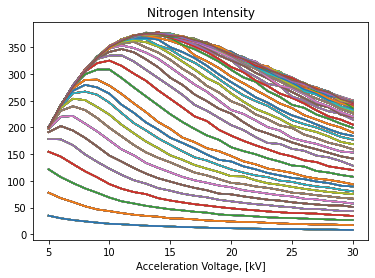

In [67]:
for esp in Espesores:
    plt.plot(df1.loc[esp].Nka,'-')
plt.title('Nitrogen Intensity')
plt.xlabel('Acceleration Voltage, [kV]')

In [19]:
zdata=df.I_ratio
ydata=df.Thickness
xdata=df.Energy

GRAFICOS DINÁMICOS

#%matplotlib notebook

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


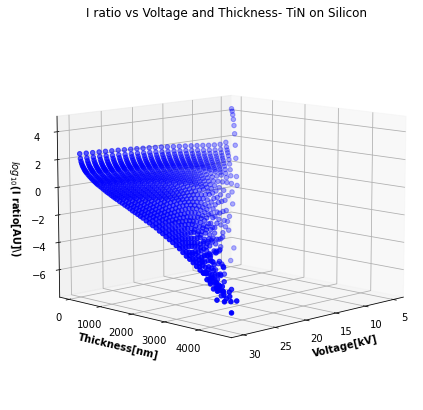

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(7,7))
ax = plt.axes(projection='3d')
ax.scatter3D(xdata, ydata, np.log10(zdata), color='blue')

ax.set_xlabel('Voltage[kV]', fontweight ='bold')
ax.set_ylabel('Thickness[nm]', fontweight ='bold')
ax.set_zlabel('$log_{10}$(I ratio[AU]\)', fontweight ='bold')
#ax.zaxis.set_scale('log')
#ax.set_ylim(0,500)

ax.set_title("I ratio vs Voltage and Thickness- TiN on Silicon")

ax.view_init(10, 45)
plt.show()

# Ajustando los datos a un modelo analítico
### El ajuste se hace utilizando el método de mínimos cuadrados con la variación de que se busca minimizar la diferencia relativa y no la absoluta entre el valor del modelo y el dato simulado 

In [21]:
from scipy.optimize import minimize # libreria que contiene funciones de optimización 
import numpy as np

In [22]:
df2 #dataframe que contiene los datos listos, los datos estan ordenados por  energías

Tika        Sika       Nka       I_ratio
Energy Thickness                                                 
5      20            0.024609  461.565000   34.7891  1.875587e+04
       40            0.024662  302.111000   77.8984  1.225026e+04
       60            0.024580  163.484000  121.6130  6.651153e+03
       80            0.024796   73.665400  154.5110  2.970834e+03
       100           0.024555   24.927300  178.2140  1.015145e+03
...                       ...         ...       ...           ...
30     4200       6931.090000    0.026037  247.8030  3.756581e-06
       4400       6906.250000    0.006206  247.5190  8.985339e-07
       4600       6920.590000    0.001380  245.0180  1.993327e-07
       4800       6945.100000    0.000000  246.9670  0.000000e+00
       5000       6911.910000    0.000000  246.8340  0.000000e+00

[1716 rows x 4 columns]

In [23]:
def mequation(I,Thc,beta,n):
    """
    Analithic Function to relate the thickness of a film with its relative ratio of intensities, i.e I_r
    """
    return Thc*np.exp(-beta*I**(1.0/n))

In [24]:
def objective(x):
    """
    El valor que retorne la función es el que se busca minimizar
    """
    thc=x[0]
    b=x[1]
    n=x[2]
    #print(e0)
    df2['Equation'] = mequation(df2.I_ratio,thc,b,n)
    df2['Discrepancy'] = np.sqrt(((df2.index.get_level_values('Thickness')-df2.Equation))**2)/df2.index.get_level_values('Thickness')*100
    dfaux=df2[df2.I_ratio>0.5e-3]
    return dfaux.loc[(e0,20):(e0,5000)].Discrepancy.pow(1).sum()#df2.loc[(e0,20):(e0,5000)].Discrepancy.pow(2).sum()

In [25]:
Energy=df1.index.get_level_values('Energy')[:26]
Energy=[i for i in range(5,31)]

In [49]:
l=[]
for e0 in Energy:
    x0=[1000,2,5]
    s=minimize(objective,x0,method='Powell')
    l.append(s)
    # mirar los errores y la documentación de la librería minimize 

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [139]:
l=[]
#x0=[100,1,1]
j=0
for e0 in Energy:
    x0=[thn[j],bn[j],nn[j]]
    s=minimize(objective,x0)
    l.append(s)
    #x0=[s.x[0],s.x[1],s.x[2]]
    j=j+1
    # mirar los errores y la documentación de la librería minimize 

In [157]:
thn,bn,nn = [], [], []
for i in l:
    print(i.x)
    thn.append(i.x[0])
    bn.append(i.x[1])
    nn.append(i.x[2])

[1.65250670e+02 1.85926875e-02 2.10020178e+00]
[241.41059732   0.47133889   2.42206499]
[333.03909614   0.74333594   2.86500731]
[447.6634569    0.92182003   3.16329439]
[515.05892229   0.92705887   3.05625908]
[618.22056033   0.98794939   3.15485883]
[802.33325475   1.13673862   3.46213467]
[888.07904188   1.12415433   3.39784358]
[1049.23448439    1.17858129    3.49059078]
[1222.74357859    1.23858955    3.5928241 ]
[1.38510275e+03 1.27680691e+00 3.68838155e+00]
[1.51065829e+03 1.27540913e+00 3.67690079e+00]
[1.62557768e+03 1.26728568e+00 3.65716024e+00]
[1.86618222e+03 1.33980555e+00 3.80937147e+00]
[2.06272243e+03 1.37110068e+00 3.87009051e+00]
[2.19356779e+03 1.36627112e+00 3.87897430e+00]
[2.57660700e+03 1.47555447e+00 4.11146860e+00]
[2.67569940e+03 1.45165836e+00 4.05124573e+00]
[3.03024534e+03 1.52792710e+00 4.22421039e+00]
[3.00061036e+03 1.46265280e+00 4.06731846e+00]
[3.22993137e+03 1.48801656e+00 4.14409501e+00]
[3.48611398e+03 1.52284393e+00 4.19272844e+00]
[3.54223812e+0

In [160]:
dic_fit={'Energy':Energy,'Thc':thn,'beta':bn,'n':nn}
dffit=pd.DataFrame(dic_fit)
#dffit.set_index('Energy').to_excel(path1+'\\'+'Fit_params_TiN_on_Si_ADD_lowKVMOD.xlsx')

In [142]:
dffit

,Energy,Thc,beta,n
0,5,165.250670,0.018593,2.100202
1,6,241.410597,0.471339,2.422065
2,7,333.039096,0.743336,2.865007
3,8,447.663457,0.921820,3.163294
4,9,515.058922,0.927059,3.056259
5,10,618.220560,0.987949,3.154859
6,11,802.333255,1.136739,3.462135
7,12,888.079042,1.124154,3.397844
8,13,1049.234484,1.178581,3.490591
9,14,1222.743579,1.238590,3.592824


In [26]:
path1

'C:\\Users\\Juan Pablo Nicolás\\Documents\\FISICA\\FISICA ESTUDIO\\MICROSCOPIA ELECTRONICA\\paper ecuacion Ene2021\\Sim_batch\\Matrix Simulation\\Silicon\\Si_lowKV'

In [123]:
xx=list(df[df.Energy==5].I_ratio.sort_values())

In [124]:
df2[df2.I_ratio!=0].loc[6]

,Tika,Sika,Nka,I_ratio,Equation,Discrepancy
Thickness,,,,,,
20,14.1081,795.465000,29.9609,5.638357e+01,78.061164,290.305822
40,24.8181,618.461000,67.6112,2.491976e+01,155.179495,287.948739
60,29.9250,440.753000,107.0690,1.472859e+01,226.645674,277.742791
80,30.7332,288.125000,145.4200,9.375041e+00,303.111201,278.889001
100,30.7893,172.452000,177.7310,5.601037e+00,407.768225,307.768225
120,30.7578,89.412200,202.6170,2.906976e+00,567.260738,372.717282
140,30.7476,40.595500,219.9520,1.320282e+00,794.203028,467.287877
160,30.7935,15.000000,231.1590,4.871158e-01,1122.943155,601.839472
180,30.7225,5.224950,236.1830,1.700692e-01,1498.886881,732.714934


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


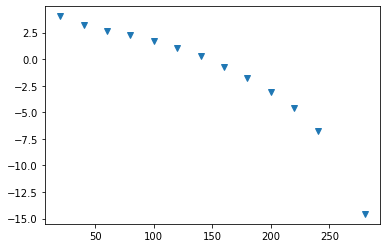

In [100]:
plt.plot(np.log(df2.loc[6].I_ratio),'v')

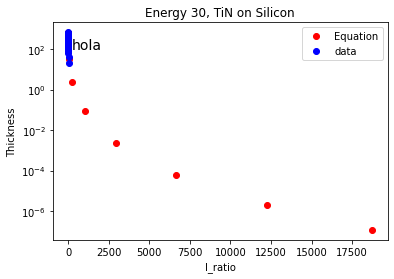

In [101]:
plt.plot(xx,mequation(xx,thn[5],bn[5],nn[5]),'ro', label='Equation')
plt.plot(df[(df.Energy==10) & (df.I_ratio!=0)].I_ratio,df.Thickness[(df.Energy==10) & (df.I_ratio!=0)],'bo',label='data')
plt.xlabel('I_ratio')
plt.ylabel('Thickness')
plt.yscale('log')
plt.title(f'Energy {e0}, TiN on Silicon')
plt.text(210,1e2,'hola',fontsize=14)
#plt.xlim(-0.001,0.02)
plt.legend()
plt.show()

In [59]:
dffit[dffit.Energy==e0].Thc.values[0]

4568.796707342274

In [60]:
mequation(xx,dffit[dffit.Energy==e0].Thc.values[0],dffit[dffit.Energy==e0].Thc.values[0],dffit[dffit.Energy==e0].Thc.values[0])

array([4568.79670734, 4568.79670734, 4568.79670734, 4568.79670734,
       4568.79670734, 4568.79670734, 4568.79670734, 4568.79670734,
       4568.79670734, 4568.79670734, 4568.79670734, 4568.79670734,
       4568.79670734, 4568.79670734, 4568.79670734, 4568.79670734,
       4568.79670734, 4568.79670734, 4568.79670734, 4568.79670734,
       4568.79670734, 4568.79670734, 4568.79670734, 4568.79670734,
       4568.79670734, 4568.79670734, 4568.79670734, 4568.79670734,
       4568.79670734, 4568.79670734, 4568.79670734, 4568.79670734,
       4568.79670734, 4568.79670734, 4568.79670734, 4568.79670734,
       4568.79670734, 4568.79670734, 4568.79670734, 4568.79670734,
       4568.79670734, 4568.79670734, 4568.79670734, 4568.79670734,
       4568.79670734, 4568.79670734, 4568.79670734, 4568.79670734,
       4568.79670734, 4568.79670734, 4568.79670734, 4568.79670734,
       4568.79670734, 4568.79670734, 4568.79670734, 4568.79670734,
          0.        ,    0.        ,    0.        ,    0.     

In [39]:
c = ['r','g','b','k','m']

In [40]:
j=0
for e0 in en:
    xx=list(df[(df.Energy==e0) & (df.I_ratio!=0)].I_ratio.sort_values())
    #xx=np.linspace(xxref[0],xxref[-1],10000)
    plt.plot(xx,mequation(xx,dffit[dffit.Energy==e0].Thc.values[0],dffit[dffit.Energy==e0].beta.values[0],dffit[dffit.Energy==e0].n.values[0]),f'{c[j-1]}-', label=f'Fit Energy={e0}')
    plt.plot(df[(df.Energy==e0) & (df.I_ratio!=0)].I_ratio,df.Thickness[(df.Energy==e0) & (df.I_ratio!=0)],f'{c[j-1]}.')
    plt.xlabel('$I_R, Dimensionless$')
    plt.ylabel('Thickness, [nm]')
    plt.xscale('log')
    plt.title('Substrate: Silicon')
    #plt.title(f'Energy={e0},TiNonSi,Thc={thn[j]},beta={bn[j]},n={nn[j]}')
    plt.xlim(1e-3,100)
    plt.ylim(0,3200)
    plt.legend()
    j=j+1
plt.savefig('Si_Th_vs_Ir_4.jpg',format='jpg',dpi=300)

NameError: name 'en' is not defined

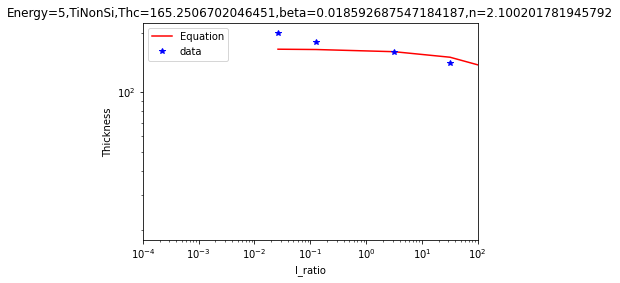

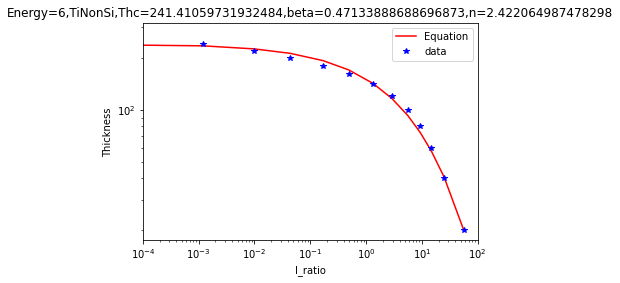

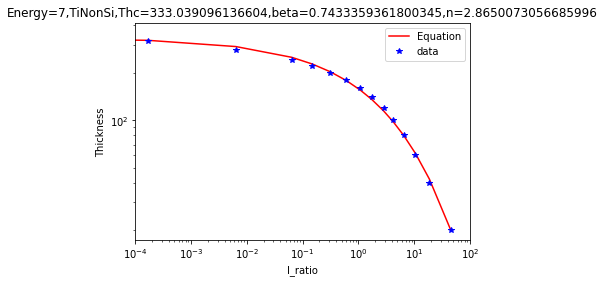

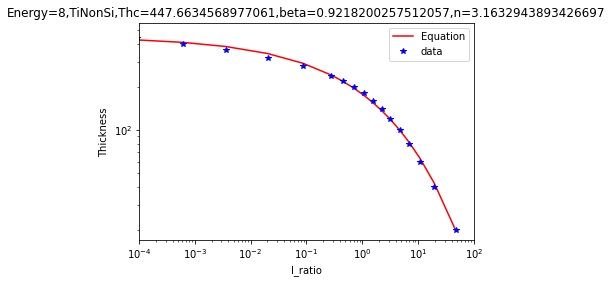

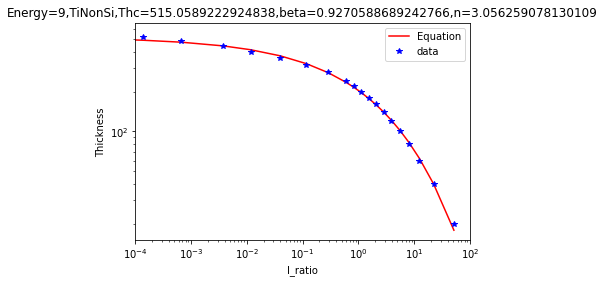

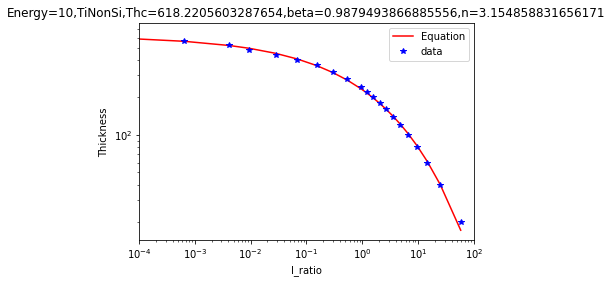

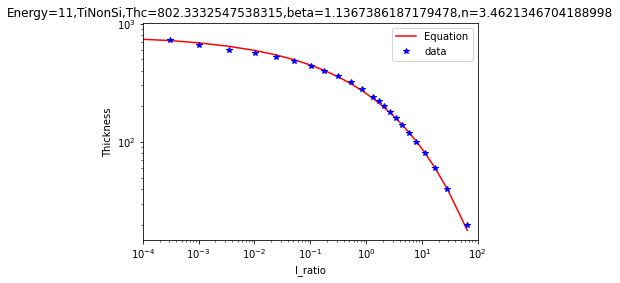

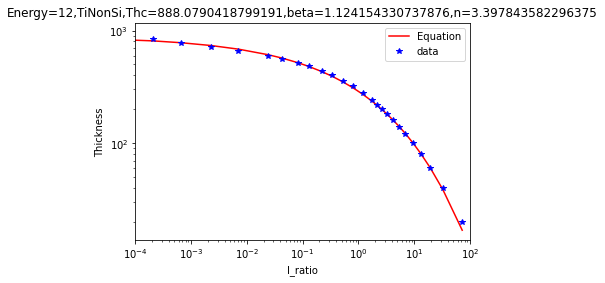

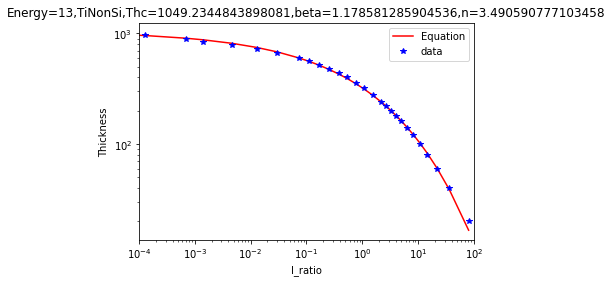

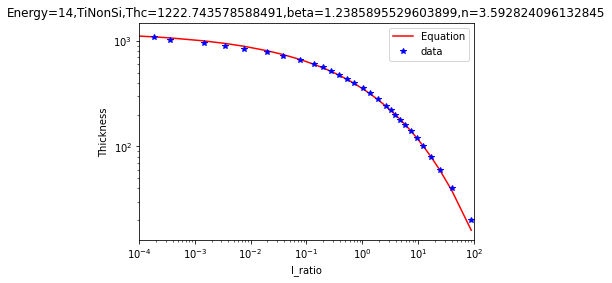

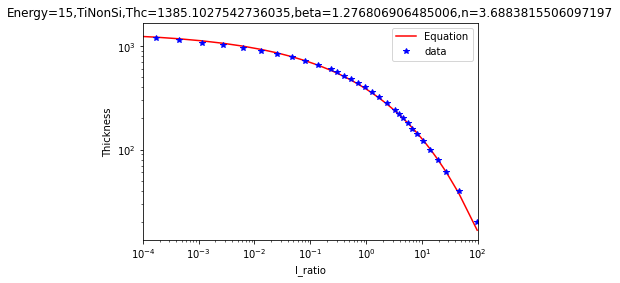

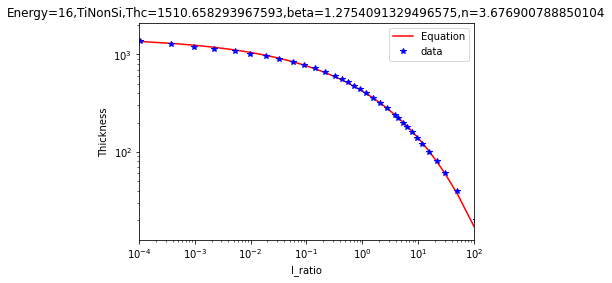

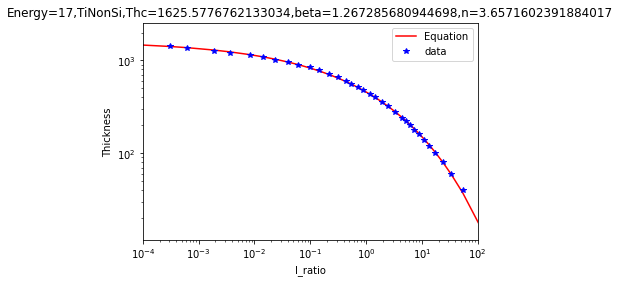

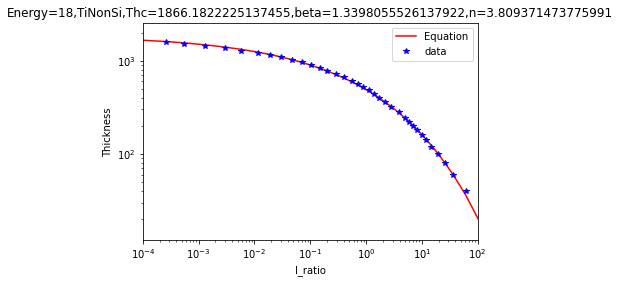

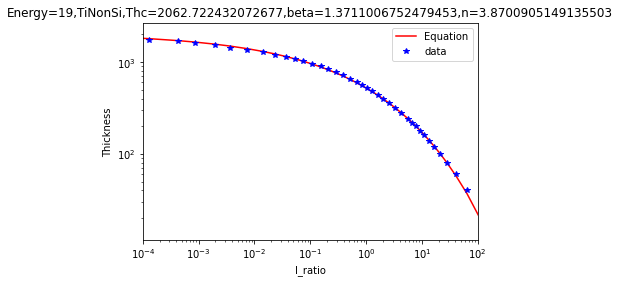

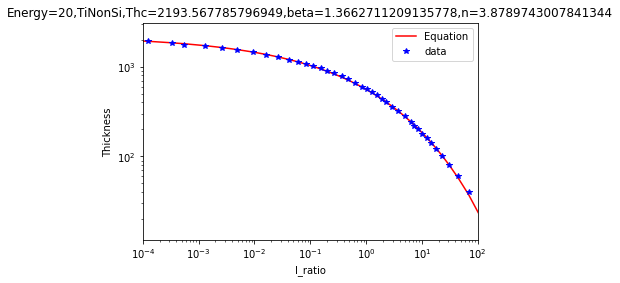

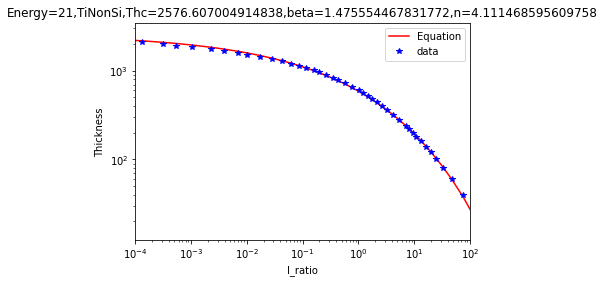

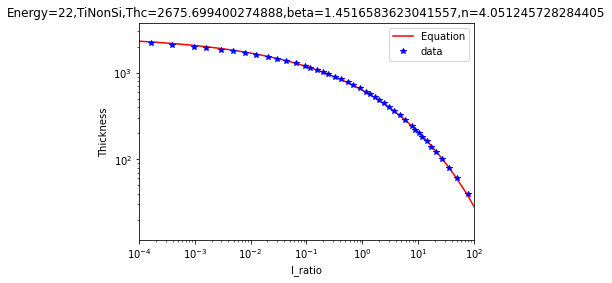

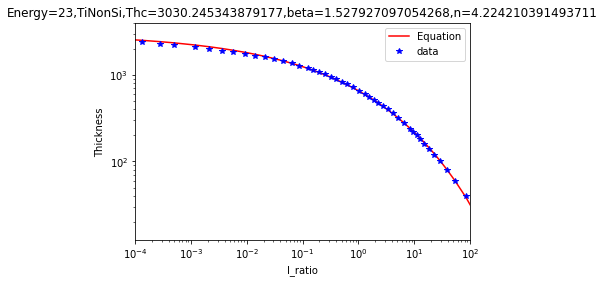

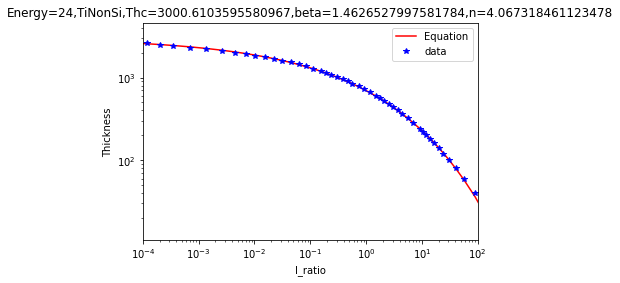

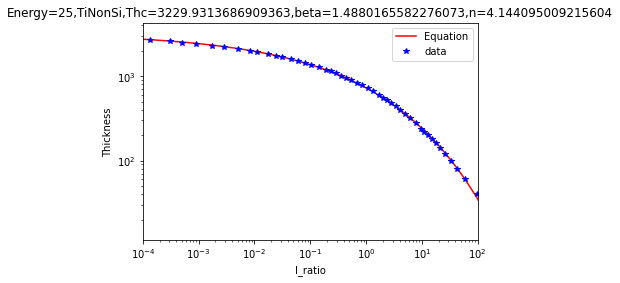

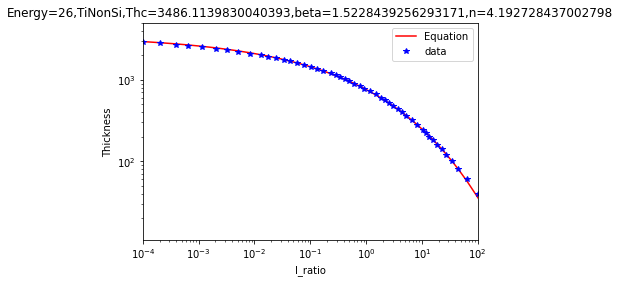

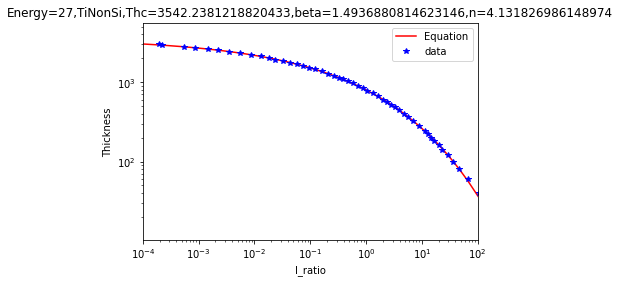

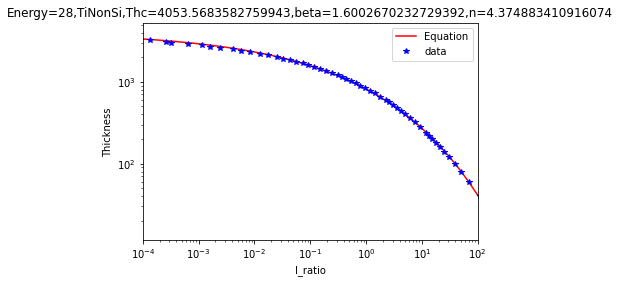

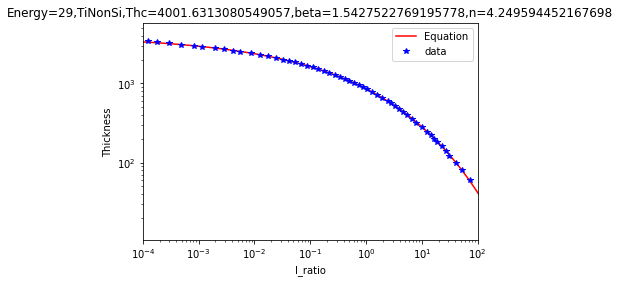

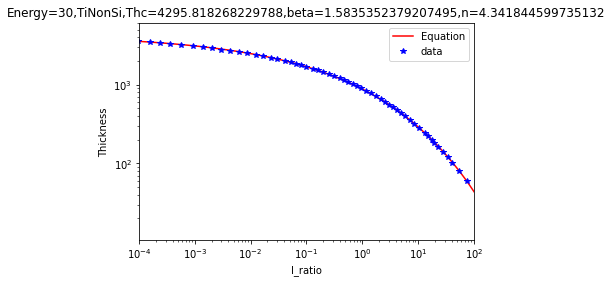

In [146]:
j=0
for e0 in Energy:
    xx=list(df[(df.Energy==e0) & (df.I_ratio!=0)].I_ratio.sort_values())
    #xx=np.linspace(xxref[0],xxref[-1],10000)
    plt.plot(xx,mequation(xx,thn[j],bn[j],nn[j]),'r', label='Equation')
    plt.plot(df[(df.Energy==e0) & (df.I_ratio!=0)].I_ratio,df.Thickness[(df.Energy==e0) & (df.I_ratio!=0)],'b*',label='data')
    plt.xlabel('I_ratio')
    plt.ylabel('Thickness')
    plt.xscale('log')
    plt.title(f'Energy={e0},TiNonSi,Thc={thn[j]},beta={bn[j]},n={nn[j]}')
    #plt.xlim(-0.001,0.02)
    #plt.ylim(1.59e2,2e3)
    plt.xlim(1e-4,1e2)
    plt.yscale('log')
    plt.legend()
    j=j+1
    plt.show()    

In [127]:
df[(df.Energy==10)&(df.I_ratio!=0)].I_ratio

0      6.582378
5      4.845057
8      3.550977
12     2.684958
15     2.065744
19     1.568966
20    58.127897
23     1.211517
26     0.945570
31     0.540997
36     0.297268
41     0.151404
46     0.068715
47    24.924988
50     0.027968
53     0.009443
55     0.004150
56     0.000644
57     0.000084
58    14.594184
59     0.000023
62     9.599983
Name: I_ratio, dtype: float64

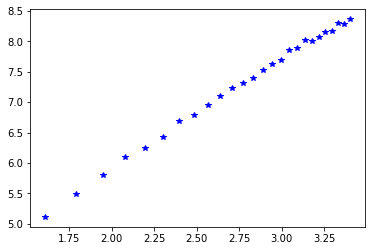

In [128]:
plt.plot(np.log(np.array(Energy)),np.log(thn),'*b')

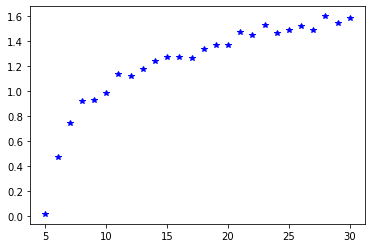

In [148]:
plt.plot(Energy,bn,'*b')

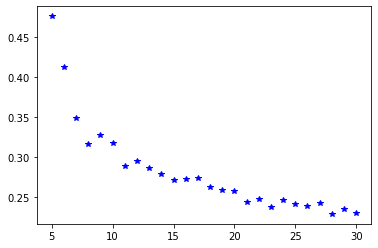

In [149]:
plt.plot(Energy,1/np.array(nn),'*b')

In [27]:
dffit=pd.read_excel(path1+'\\'+'Fit_params_TiN_on_Si_ADD_lowKVMOD.xlsx')
thn,bn,nn = [], [], []
for i in range(len(dffit.Thc)):
    thn.append(dffit.Thc[i])
    bn.append(dffit.beta[i])
    nn.append(dffit.n[i])

# Calculo de las discrepancias

In [28]:
j=0
disc={}
lista=[]
dfneww=pd.DataFrame()
xn,yn,dn,enn = [], [], [], []
for e0 in Energy:
    xx=list(df[(df.Energy==e0) & (df.I_ratio!=0)].I_ratio)
    yy=list(df.Thickness[(df.Energy==e0) & (df.I_ratio!=0)])
    dd=list(mequation(xx,thn[j],bn[j],nn[j]))
    en=[]
    for u in range(0,len(xx)):
        en.append(e0)
    #en=list(df.Energy[(df.Energy==e0)& (df.I_ratio!=0)])
    j=j+1
    xn,yn,dn,enn = xn+xx, yn+yy, dn+dd, enn+en
disc['Energy'],disc['I_ratio'],disc['Th_Data'],disc['Th_Eq'] = enn,xn,yn,dn

dfneww=pd.DataFrame(disc)
dfneww['DiscrepancyP']=(dfneww.Th_Data-dfneww.Th_Eq)/dfneww.Th_Data*100
#dfneww.idex=dfneww.Energy
dfneww
dfaux=dfneww.sort_values('Th_Data').sort_values('Energy').set_index(['Energy'])
#dfaux.to_excel(path+'\\'+'Si_Discrepancy.xlsx')

In [29]:
dfneww.sort_values('Energy')

,Energy,I_ratio,Th_Data,Th_Eq,DiscrepancyP
0,5,1015.145345,100,100.008408,-0.008408
1,5,240.484585,120,128.314545,-6.928788
2,5,31.994786,140,150.000814,-7.143439
3,5,3.187321,160,160.000221,-0.000138
4,5,0.126964,180,164.104637,8.830757
...,...,...,...,...,...
971,30,13.424189,240,241.133739,-0.472391
972,30,0.008496,2500,2533.431722,-1.337269
973,30,0.006231,2600,2627.318682,-1.050719
975,30,0.002921,2800,2842.518142,-1.518505


In [152]:
dfneww.columns
cols=['Energy', 'Th_Data', 'Th_Eq', 'I_ratio', 'DiscrepancyP']

In [30]:
dfdisc = dfneww[(dfneww.Energy>6)&(dfneww.Th_Data>20)].set_index(['Energy','Th_Data']).sort_index()
dfdisc

I_ratio        Th_Eq  DiscrepancyP
Energy Th_Data                                         
7      40       1.864794e+01    42.282634     -5.706584
       60       1.045629e+01    61.667299     -2.778832
       80       6.467663e+00    80.005982     -0.007477
       100      4.202901e+00    97.641828      2.358172
       120      2.813425e+00   114.628726      4.476062
...                      ...          ...           ...
30     3900     1.638698e-05  3790.460974      2.808693
       4000     9.572694e-06  3846.110507      3.847237
       4200     3.756581e-06  3929.429176      6.442162
       4400     8.985339e-07  4028.996890      8.431889
       4600     1.993327e-07  4105.426996     10.751587

[962 rows x 3 columns]

In [154]:
#dfdisc.to_excel(path+'\\'+'Si_Discrepancy.xlsx')

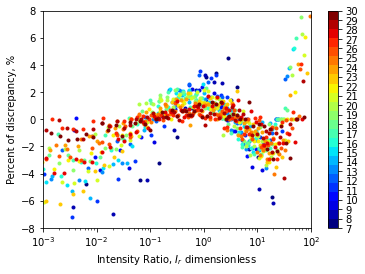

In [35]:
import numpy as np 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
N=24
cmap = plt.get_cmap('jet', N) 
li=0
for e0 in Energy[2:]:
    plt.plot(dfdisc.loc[e0].I_ratio,dfdisc.loc[e0].DiscrepancyP,'.',c=cmap(li))
    #plt.xscale('log')
    li=li+1
norm = mpl.colors.Normalize(vmin=7, vmax=30) 

# creating ScalarMappable 
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm) 
sm.set_array([]) 
plt.colorbar(sm, ticks=np.linspace(7, 30, N)) 
plt.xscale('log')
plt.xlim(1e-3,1e2)
plt.ylim(-8,8)
plt.xlabel('Intensity Ratio, $I_r$ dimensionless')
plt.ylabel('Percent of discrepancy, %')
#plt.savefig('SiDiscrepancyMOD.tif',format='tiff',dpi=600)
plt.show()

95.67307692307693

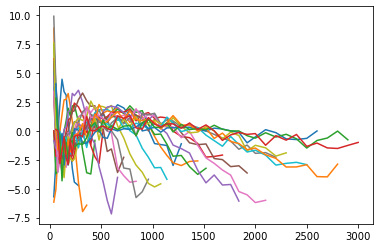

In [41]:
c1=0
c2=0
for e0 in Energy[2:]:
    plt.plot(dfdisc[(dfdisc.I_ratio>1e-3)&(dfdisc.I_ratio<1e2)].loc[e0].DiscrepancyP)
    for j in dfdisc[(dfdisc.I_ratio>1e-3)&(dfdisc.I_ratio<1e1)].loc[e0].DiscrepancyP:
        if abs(j) > 4:
            c1+=1
        else: 
            c2+=1
c2/(c2+c1)*100

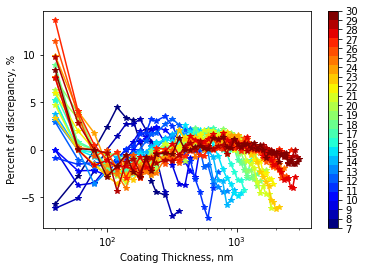

In [42]:
import numpy as np 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
N=24
cmap = plt.get_cmap('jet', N) 
li=0
for e0 in Energy[2:]:
    plt.plot(dfdisc[(dfdisc.I_ratio>1e-3)].loc[e0].DiscrepancyP,'-*',c=cmap(li))
    #plt.xscale('log')
    li=li+1
norm = mpl.colors.Normalize(vmin=7, vmax=30) 

# creating ScalarMappable 
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm) 
sm.set_array([]) 
plt.colorbar(sm, ticks=np.linspace(7, 30, N)) 
plt.xscale('log')

plt.xlabel('Coating Thickness, nm')
plt.ylabel('Percent of discrepancy, %')
#plt.savefig('Thc_SiDiscrepancyMOD.jpg',format='jpg',dpi=300)
plt.show()

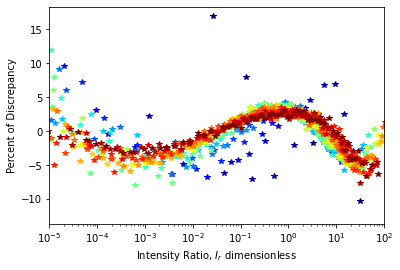

In [36]:
colors=plt.cm.jet(np.linspace(0,1,len(Energy)))
li=0

for e0 in Energy:
    #e0=28
    plt.plot(dfneww[(dfneww.Energy==e0)&(dfneww.Th_Data>20)].I_ratio,dfneww[(dfneww.Energy==e0)&(dfneww.Th_Data>20)].DiscrepancyP,'*',c=colors[li],label=f'{e0}')
    plt.xscale('log')
    plt.xlabel('Intensity Ratio, $I_r$ dimensionless')
    plt.ylabel('Percent of Discrepancy')
    plt.xlim(1e-5,1e2)
    #plt.ylim(-7.5,7.5)
    li=li+1
#plt.legend()
#plt.show()
#plt.figure(figsize=(10,12))
#plt.savefig('Discrepancy.jpg',format='jpg',dpi=300)

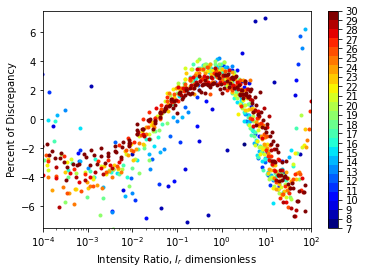

In [37]:
import numpy as np 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
N=24
cmap = plt.get_cmap('jet', N) 
li=0
for e0 in Energy:
    #e0=30
    plt.plot(dfneww[(dfneww.Energy==e0)&(dfneww.Th_Data>0)].I_ratio,dfneww[(dfneww.Energy==e0)&(dfneww.Th_Data>0)].DiscrepancyP,'.',c=cmap(li))
    plt.xscale('log')
    plt.xlabel('Intensity Ratio, $I_r$ dimensionless')
    plt.ylabel('Percent of Discrepancy')
    plt.xlim(1e-4,1e2)
    plt.ylim(-7.5,7.5)
    li=li+1
    
# Normalizer 
norm = mpl.colors.Normalize(vmin=7, vmax=30) 
  
# creating ScalarMappable 
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm) 
sm.set_array([]) 
plt.colorbar(sm, ticks=np.linspace(7, 30, N)) 
plt.savefig('Discrepancy.jpg',format='jpg',dpi=300)
plt.show() 

# Ejemplo de un ajuste por mínimos cuadrados utilizando la librería curve_fit

In [38]:
from scipy.optimize import curve_fit

In [39]:
def ajuste(x,a,b):
    return a*x**b

In [40]:
parameters, covariance = curve_fit(ajuste, Energy, thn)

13.554176671859016 1.7175113925194359
[[ 6.90668917e-01 -1.58843317e-02]
 [-1.58843317e-02  3.67108060e-04]]


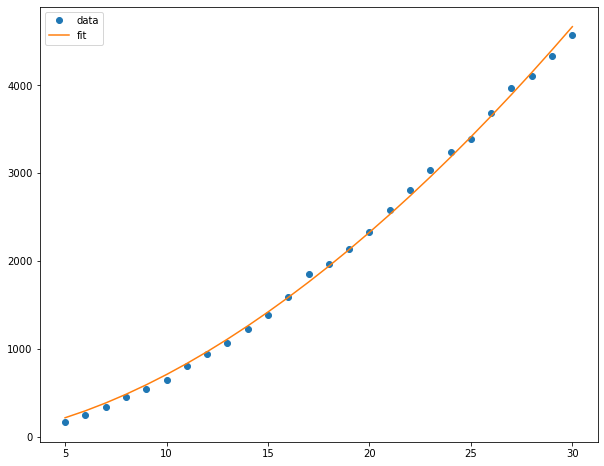

In [41]:
fit_A = parameters[0]
fit_B = parameters[1]
fig = plt.figure(figsize=(10,8))
print(fit_A,fit_B)
print(covariance)
fit_y = ajuste(Energy, fit_A, fit_B)
plt.plot(Energy, thn, 'o', label='data')
plt.plot(Energy, fit_y, '-', label='fit')

plt.legend()

El ajuste de los dato se está haciendo para los datos que no son igual a cero
Es necesario graficar Thickness vs I_ratio para la ecuación y para los datos de la simulación, así poder apreciar de forma grafica si el ajuste es cercano

# Analísis 

Text(0.5, 0, 'Energy-EcSi-EcTi')

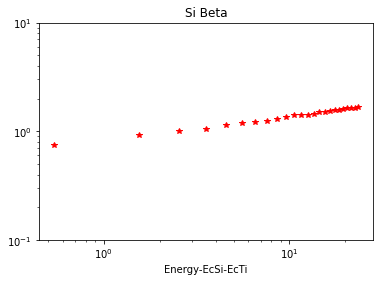

In [55]:
plt.plot(dffit.Energy-1.740-(4.512+4.933)/2,dffit.beta,'r*')
plt.title('Si Beta')
plt.ylim(1e-1,1e1)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energy-EcSi-EcTi')

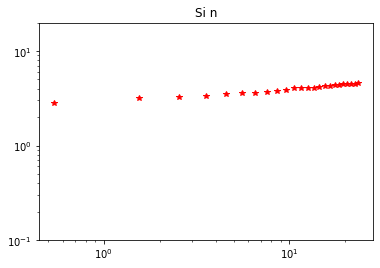

In [54]:
plt.plot(dffit.Energy-1.740-(4.512+4.933)/2,dffit.n,'r*')
plt.title('Si n')
plt.ylim(1e-1,2e1)
plt.xscale('log')
plt.yscale('log')

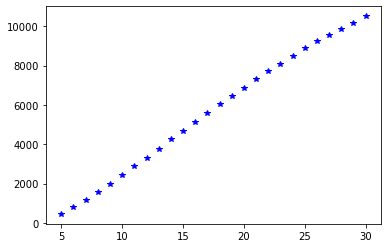

In [42]:
plt.plot(df[df.Thickness==20].Energy,df[df.Thickness==20].Sika,'b*')

In [43]:
epsres=list(df[df.Energy==10].Thickness.sort_values())

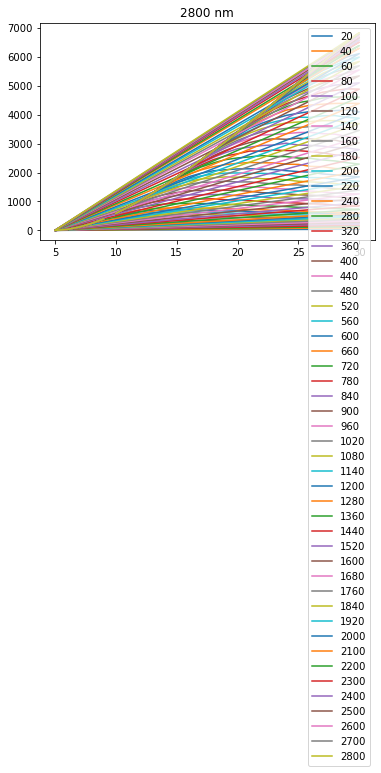

In [44]:
j=0
for i in epsres:
    j=j+1
    if j==50:
        break
    else:
        plt.plot(df[df.Thickness==i].Energy,df[df.Thickness==i].Tika,label=i)
        plt.title(f'{i} nm')
        plt.legend()
plt.show()

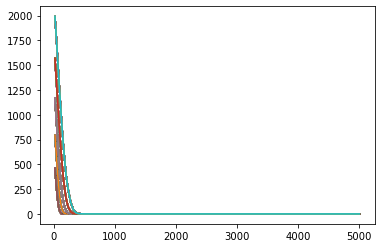

In [45]:
for i in energy:
    #plt.figure(figsize=(7,9))
    plt.plot(df2.loc[i,:].Sika)
#plt.xlim(500,1500)
plt.show()